<a href="https://colab.research.google.com/github/vineet891/DL-Assignment/blob/dev/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning - Comprehensive Comparision**

We evaluate and compare 17 different Deep Neural Network models for a Multiclass Classification task. The models differ in hyperparameters such as -


*   Activation Functions in the hidden layers
  1.   Sigmoid   
  2.   Tanh
  3.   ReLU

*   Loss Functions
  1.   Categorical Cross-Entropy
  2.   KL-Divergence

*   Number of Hidden Layers - 1 to 10
*   Number of Nodes in Hidden Layers - 16 to 1024

The output layer has 10 nodes, with the output activation function being the Softmax function, as we are doing Multiclass Classificaion.







**Implementation**


1.   This notebook uses Tensorflow, NumPy, pandas and matplotlib libraries to implement the models.
2.   We use Tensorflow to create the architecture of the models.
3.   The models are trained on the training set, and then evaluated using the testing set of the dataset



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Loading Data**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#data preprocessing
x_train = x_train/255
x_test = x_test/255

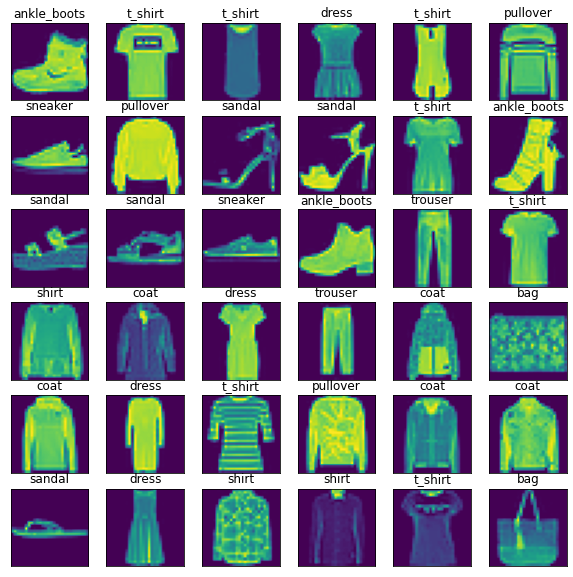

In [5]:
# sample datapoints from the train set
class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [6]:
# one hot encoding the target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# split the training data into validation set and training set
X_valid, X_train = x_train[:5000], x_train[5000:]
Y_valid, Y_train = y_train[:5000], y_train[5000:]

# **MODEL 1**

*   Hidden Layers = 1
*   Number of Hidden Nodes in Layer 1 = 128
*   Activation Function = ReLU
*   Loss Function = Categorical Cross-Entropy

In [ ]:
model1 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])

#define optimizer,loss function and evaluation metric
model1.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history1 = model1.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7329 - accuracy: 0.7646 - val_loss: 0.5486 - val_accuracy: 0.8238
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5106 - accuracy: 0.8265 - val_loss: 0.4690 - val_accuracy: 0.8426
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4662 - accuracy: 0.8396 - val_loss: 0.4396 - val_accuracy: 0.8512
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8474 - val_loss: 0.4299 - val_accuracy: 0.8524
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4233 - accuracy: 0.8530 - val_loss: 0.4026 - val_accuracy: 0.8640
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4086 - accuracy: 0.8575 - val_loss: 0.3895 - val_accuracy: 0.8686
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3968 - accuracy: 0.8622 - val_loss: 0.3814 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

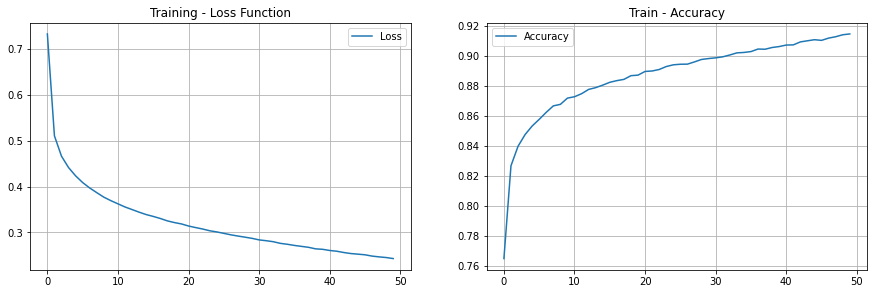

In [ ]:
# plot the Loss vs epochs and Accuracy vs Epochs charts
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history1.history['loss'], label='Loss')
#plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history1.history['accuracy'], label='Accuracy')
#plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
# test th model
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8810


[0.3355216979980469, 0.8809999823570251]

# **MODEL 2**

*   Hidden Layers = 1
*   Number of Hidden Nodes in Layer 1 = 128
*   Activation Function = Tanh
*   Loss Function = Categorical Cross-Entropy

In [ ]:
model2 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model2.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history2 = model2.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7178 - accuracy: 0.7663 - val_loss: 0.5390 - val_accuracy: 0.8154
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5056 - accuracy: 0.8258 - val_loss: 0.4623 - val_accuracy: 0.8428
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4616 - accuracy: 0.8393 - val_loss: 0.4310 - val_accuracy: 0.8536
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4374 - accuracy: 0.8467 - val_loss: 0.4161 - val_accuracy: 0.8560
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8526 - val_loss: 0.3979 - val_accuracy: 0.8642
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4081 - accuracy: 0.8557 - val_loss: 0.3855 - val_accuracy: 0.8676
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3976 - accuracy: 0.8597 - val_loss: 0.3771 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

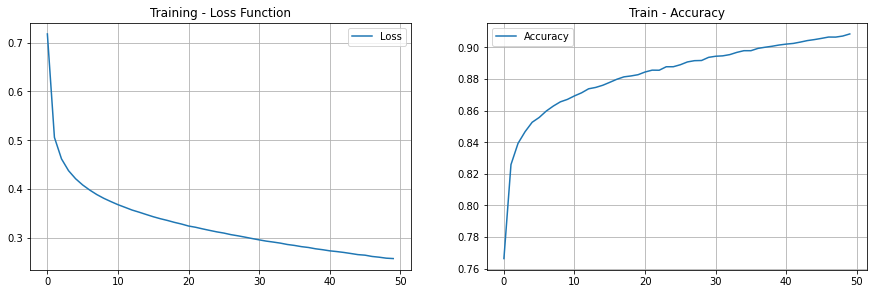

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history2.history['loss'], label='Loss')
#plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history2.history['accuracy'], label='Accuracy')
#plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8745


[0.3465614914894104, 0.8744999766349792]

# **MODEL 3**

*   Hidden Layers = 1
*   Number of Hidden Nodes in Layer 1 = 128
*   Activation Function = Sigmoid
*   Loss Function = Categorical Cross-Entropy

In [ ]:
#Model3
"""
Hidden Layers =1
Number of hidden nodes in layer 1 = 128
Activation Function =Sigmoid
Loss function = Categorical cross entropy

"""
model3 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model3.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history3 = model3.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3046 - accuracy: 0.6669 - val_loss: 0.8810 - val_accuracy: 0.7484
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7873 - accuracy: 0.7554 - val_loss: 0.6978 - val_accuracy: 0.7746
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6703 - accuracy: 0.7766 - val_loss: 0.6212 - val_accuracy: 0.7952
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6113 - accuracy: 0.7933 - val_loss: 0.5755 - val_accuracy: 0.8104
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5736 - accuracy: 0.8035 - val_loss: 0.5442 - val_accuracy: 0.8196
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5467 - accuracy: 0.8125 - val_loss: 0.5234 - val_accuracy: 0.8244
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5261 - accuracy: 0.8176 - val_loss: 0.5056 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

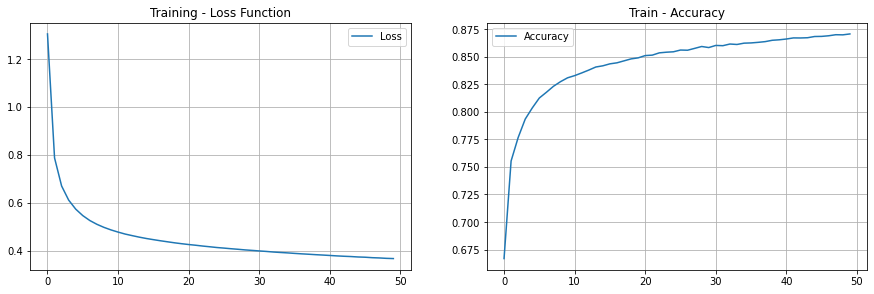

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history3.history['loss'], label='Loss')
#plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history3.history['accuracy'], label='Accuracy')
#plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8535


[0.41162431240081787, 0.8535000085830688]

# **MODEL 4**

*   Hidden Layers = 2
*   Number of Hidden Nodes in Layer 1 = 256
*   Number of Hidden Nodes in Layer 2 = 128
*   Activation Function = ReLU
*   Loss Function = Categorical Cross-Entropy

In [ ]:
model4 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model4.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history4 = model4.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7300 - accuracy: 0.7609 - val_loss: 0.5161 - val_accuracy: 0.8232
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4920 - accuracy: 0.8302 - val_loss: 0.4789 - val_accuracy: 0.8390
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4452 - accuracy: 0.8430 - val_loss: 0.4193 - val_accuracy: 0.8568
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4171 - accuracy: 0.8533 - val_loss: 0.4154 - val_accuracy: 0.8580
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3961 - accuracy: 0.8598 - val_loss: 0.4025 - val_accuracy: 0.8592
Epoch 6/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3797 - accuracy: 0.8660 - val_loss: 0.3820 - val_accuracy: 0.8682
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3658 - accuracy: 0.8702 - val_loss: 0.3667 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

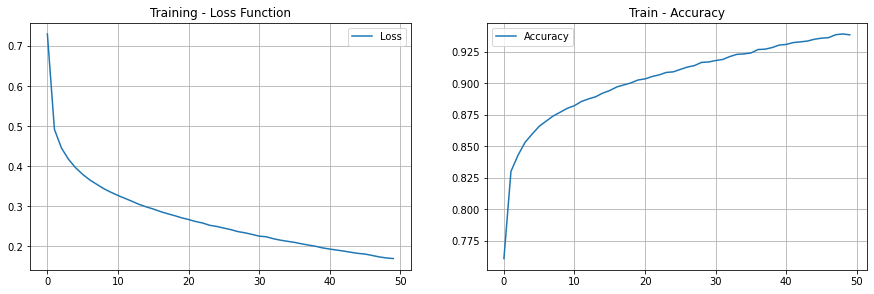

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history4.history['loss'], label='Loss')
#plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history4.history['accuracy'], label='Accuracy')
#plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8883


[0.331291139125824, 0.8883000016212463]

# **MODEL 5**

*   Hidden Layers = 2
*   Number of Hidden Nodes in Layer 1 = 128
*   Number of Hidden Nodes in Layer 2 = 64
*   Activation Function = Sigmoid
*   Loss Function = KL Divergence

In [ ]:
model5 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model5.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history5 = model5.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0835 - accuracy: 0.4258 - val_loss: 1.7243 - val_accuracy: 0.5684
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4129 - accuracy: 0.5950 - val_loss: 1.1776 - val_accuracy: 0.6358
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0673 - accuracy: 0.6611 - val_loss: 0.9547 - val_accuracy: 0.6908
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8969 - accuracy: 0.7010 - val_loss: 0.8258 - val_accuracy: 0.7310
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7912 - accuracy: 0.7271 - val_loss: 0.7403 - val_accuracy: 0.7376
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7217 - accuracy: 0.7412 - val_loss: 0.6833 - val_accuracy: 0.7566
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6750 - accuracy: 0.7516 - val_loss: 0.6445 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

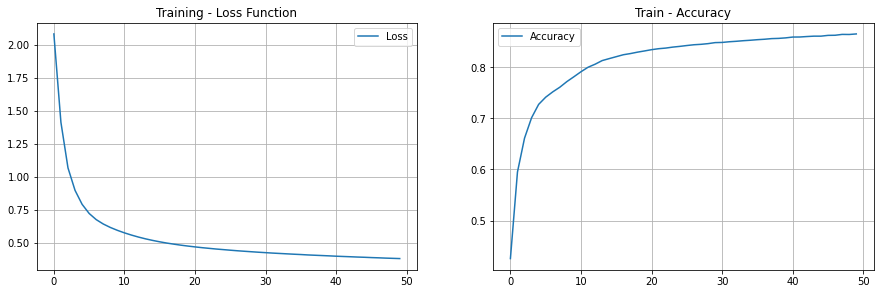

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history5.history['loss'], label='Loss')
#plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history5.history['accuracy'], label='Accuracy')
#plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8487


[0.4199427664279938, 0.8486999869346619]

# **MODEL 6**

*   Hidden Layers = 3
*   Number of Hidden Nodes in Layer 1 = 64
*   Number of Hidden Nodes in Layer 2 = 32
*   NUmber of Hidden Nodes in Layer 3 = 16
*   Activation Function = Sigmoid
*   Loss Function = KL Divergence

In [ ]:
model6 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(32,activation='sigmoid'),
                                   tf.keras.layers.Dense(16,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model6.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history6 = model6.fit(X_train,Y_train,epochs=80, validation_data=(X_valid, Y_valid))

Epoch 1/80
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2995 - accuracy: 0.1620 - val_loss: 2.2786 - val_accuracy: 0.2942
Epoch 2/80
1719/1719 [==============================] - 6s 3ms/step - loss: 2.2494 - accuracy: 0.2446 - val_loss: 2.1977 - val_accuracy: 0.2234
Epoch 3/80
1719/1719 [==============================] - 6s 3ms/step - loss: 2.0679 - accuracy: 0.2373 - val_loss: 1.9015 - val_accuracy: 0.2500
Epoch 4/80
1719/1719 [==============================] - 6s 3ms/step - loss: 1.7837 - accuracy: 0.3123 - val_loss: 1.6951 - val_accuracy: 0.4120
Epoch 5/80
1719/1719 [==============================] - 6s 4ms/step - loss: 1.6419 - accuracy: 0.4513 - val_loss: 1.5847 - val_accuracy: 0.5048
Epoch 6/80
1719/1719 [==============================] - 6s 4ms/step - loss: 1.5247 - accuracy: 0.4878 - val_loss: 1.4502 - val_accuracy: 0.4968
Epoch 7/80
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3801 - accuracy: 0.5233 - val_loss: 1.3018 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

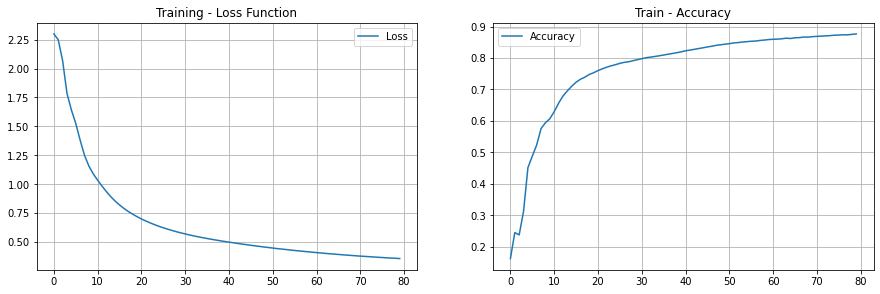

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history6.history['loss'], label='Loss')
#plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history6.history['accuracy'], label='Accuracy')
#plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model6.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8556


[0.4128319323062897, 0.8555999994277954]

# **MODEL 7**

*   Hidden Layers = 4
*   Number of hidden nodes in layer 1 = 512
*   Number of hidden nodes in layer 2 = 256
* Number of hidden nodes in layer 3 = 128
* Number of hidden nodes in layer 4 = 64
*   Activation Function = Sigmoid
*   Loss Function = Categorical Cross-Entropy

In [ ]:
model7 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='sigmoid'),
                                   tf.keras.layers.Dense(256,activation='sigmoid'),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model7.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [ ]:
#train the model
history7 = model7.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 8s 4ms/step - loss: 2.3052 - accuracy: 0.1051 - val_loss: 2.3006 - val_accuracy: 0.0916
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2984 - accuracy: 0.1182 - val_loss: 2.2977 - val_accuracy: 0.0976
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2930 - accuracy: 0.1372 - val_loss: 2.2876 - val_accuracy: 0.1738
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2822 - accuracy: 0.1713 - val_loss: 2.2733 - val_accuracy: 0.1938
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2499 - accuracy: 0.2498 - val_loss: 2.2082 - val_accuracy: 0.2076
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0504 - accuracy: 0.3065 - val_loss: 1.8072 - val_accuracy: 0.3338
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6600 - accuracy: 0.3824 - val_loss: 1.5326 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

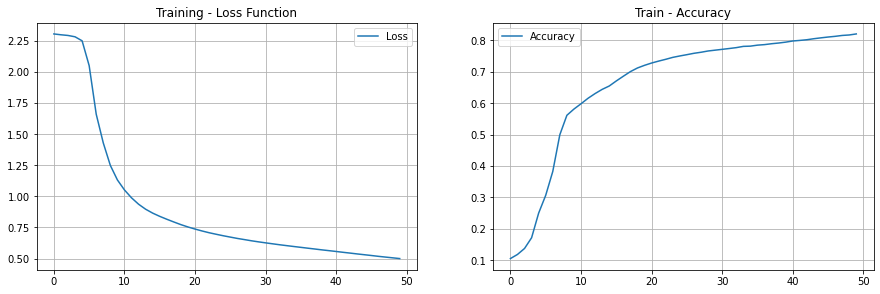

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history7.history['loss'], label='Loss')
#plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history7.history['accuracy'], label='Accuracy')
#plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model7.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.8131


[0.5264825224876404, 0.8130999803543091]

# **MODEL 8**

*   Hidden Layers = 4
*   Number of hidden nodes in layer 1 = 128
*   Number of hidden nodes in layer 2 = 64
* Number of hidden nodes in layer 3 = 32
* Number of hidden nodes in layer 4 = 16
*   Activation Function = Tanh
*   Loss Function = KL Divergence

In [ ]:
model8 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model8.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
________________________________________________

In [ ]:
#train the model
history8 = model8.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))
#maybe overfitting

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8402 - accuracy: 0.7432 - val_loss: 0.5630 - val_accuracy: 0.8220
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5107 - accuracy: 0.8266 - val_loss: 0.4505 - val_accuracy: 0.8490
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4495 - accuracy: 0.8445 - val_loss: 0.4201 - val_accuracy: 0.8528
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4163 - accuracy: 0.8544 - val_loss: 0.3930 - val_accuracy: 0.8630
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3931 - accuracy: 0.8624 - val_loss: 0.3826 - val_accuracy: 0.8640
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3761 - accuracy: 0.8662 - val_loss: 0.3818 - val_accuracy: 0.8688
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3622 - accuracy: 0.8708 - val_loss: 0.3606 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

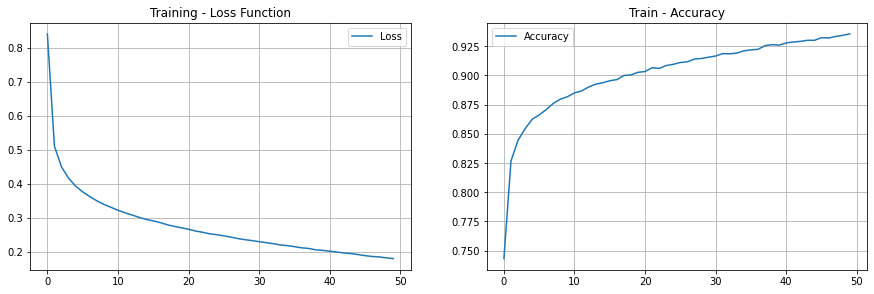

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history8.history['loss'], label='Loss')
#plt.plot(history8.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history8.history['accuracy'], label='Accuracy')
#plt.plot(history8.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model8.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8843


[0.3450313210487366, 0.8842999935150146]

# **MODEL 9**

*   Hidden Layers = 5
*   Number of hidden nodes in layer 1 = 256
*   Number of hidden nodes in layer 2 = 128
* Number of hidden nodes in layer 3 = 64
* Number of hidden nodes in layer 4 = 32
*   Number of hidden nodes in layer 5 = 16
*   Activation Function = ReLU
*   Loss Function = Categorical Cross-Entropy

In [ ]:
model9 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model9.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 10)               

In [ ]:
#train the model
history9 = model9.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8716 - accuracy: 0.6938 - val_loss: 0.5822 - val_accuracy: 0.7930
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4876 - accuracy: 0.8290 - val_loss: 0.4610 - val_accuracy: 0.8424
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4213 - accuracy: 0.8493 - val_loss: 0.3714 - val_accuracy: 0.8688
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3827 - accuracy: 0.8612 - val_loss: 0.3532 - val_accuracy: 0.8730
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3588 - accuracy: 0.8697 - val_loss: 0.3399 - val_accuracy: 0.8718
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3410 - accuracy: 0.8763 - val_loss: 0.3542 - val_accuracy: 0.8674
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3259 - accuracy: 0.8814 - val_loss: 0.2914 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

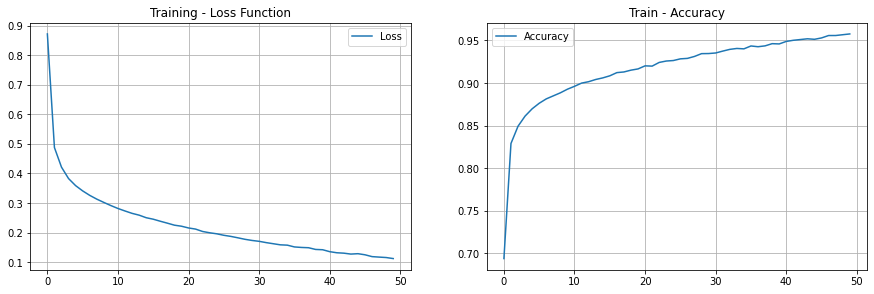

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history9.history['loss'], label='Loss')
#plt.plot(history9.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history9.history['accuracy'], label='Accuracy')
#plt.plot(history9.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model9.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.8774


[0.45425575971603394, 0.8773999810218811]

# **MODEL 10**

*   Hidden Layers = 5
*   Number of hidden nodes in layer 1 = 512
*   Number of hidden nodes in layer 2 = 256
*   Number of hidden nodes in layer 3 = 128
* Number of hidden nodes in layer 4 = 64
* Number of hidden nodes in layer 5 = 32
*   Activation Function = Sigmoid
*   Loss Function = KL Divergence

In [38]:
model10 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='sigmoid'),
                                   tf.keras.layers.Dense(256,activation='sigmoid'),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(32,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model10.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model10.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_60 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_61 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 10)               

In [39]:
#train the model
history10 = model10.fit(X_train,Y_train,epochs=90, validation_data=(X_valid, Y_valid))

Epoch 1/90
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3067 - accuracy: 0.1006 - val_loss: 2.3036 - val_accuracy: 0.1030
Epoch 2/90
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3032 - accuracy: 0.1019 - val_loss: 2.3032 - val_accuracy: 0.1008
Epoch 3/90
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3029 - accuracy: 0.1008 - val_loss: 2.3033 - val_accuracy: 0.0914
Epoch 4/90
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1027 - val_loss: 2.3025 - val_accuracy: 0.1008
Epoch 5/90
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3025 - accuracy: 0.1025 - val_loss: 2.3017 - val_accuracy: 0.1622
Epoch 6/90
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3019 - accuracy: 0.1053 - val_loss: 2.3008 - val_accuracy: 0.1012
Epoch 7/90
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3016 - accuracy: 0.1070 - val_loss: 2.3009 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

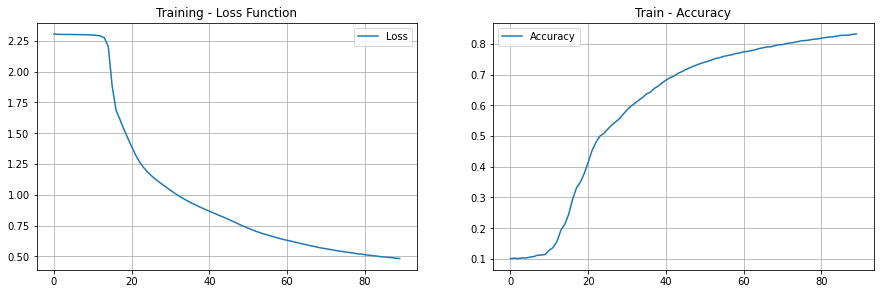

In [42]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history10.history['loss'], label='Loss')
#plt.plot(history10.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history10.history['accuracy'], label='Accuracy')
#plt.plot(history10.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [41]:
model10.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.8144


[0.529371440410614, 0.8144000172615051]

# **MODEL 11**

*   Hidden Layers = 6
* Number of hidden nodes in layer 1 =  512
* Number of hidden nodes in layer 2 =  512
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  128
* Number of hidden nodes in layer 5 =  64
* Number of hidden nodes in layer 6 =  32
*   Activation Function = ReLU
*   Loss Function = KL Divergence

In [12]:
model11 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model11.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [13]:
#train the model
history11 = model11.fit(X_train,Y_train,epochs=15, validation_data=(X_valid, Y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8143 - accuracy: 0.7194 - val_loss: 0.5200 - val_accuracy: 0.8196
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4793 - accuracy: 0.8307 - val_loss: 0.4247 - val_accuracy: 0.8470
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4135 - accuracy: 0.8521 - val_loss: 0.3959 - val_accuracy: 0.8630
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3769 - accuracy: 0.8642 - val_loss: 0.3658 - val_accuracy: 0.8686
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3487 - accuracy: 0.8730 - val_loss: 0.3483 - val_accuracy: 0.8772
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3293 - accuracy: 0.8796 - val_loss: 0.3442 - val_accuracy: 0.8758
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8851 - val_loss: 0.3310 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

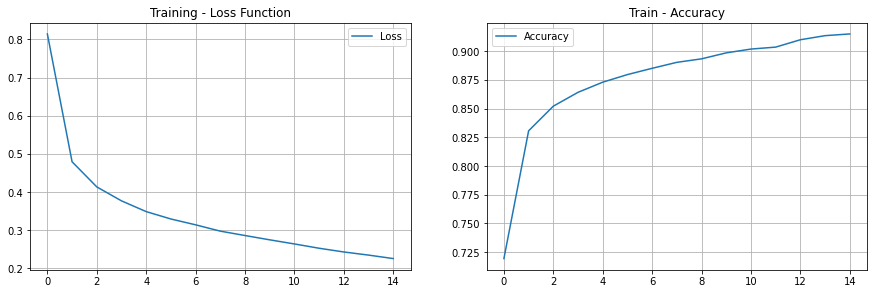

In [37]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history11.history['loss'], label='Loss')
#plt.plot(history11.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history11.history['accuracy'], label='Accuracy')
#plt.plot(history11.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [15]:
model11.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8792


[0.3419411778450012, 0.8791999816894531]

# **MODEL 12**

*   Hidden Layers = 7
* Number of hidden nodes in layer 1 =  512
* Number of hidden nodes in layer 2 =  256
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  128
* Number of hidden nodes in layer 5 =  64
* Number of hidden nodes in layer 6 =  32
* Number of hidden nodes in layer 7 =  16
*   Activation Function = ReLU
*   Loss Function = KL Divergence

In [ ]:
model12 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model12.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 32)              

In [ ]:
#train the model
history12 = model12.fit(X_train,Y_train,epochs=18, validation_data=(X_valid, Y_valid))

Epoch 1/18
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8995 - accuracy: 0.6953 - val_loss: 0.7408 - val_accuracy: 0.7036
Epoch 2/18
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4822 - accuracy: 0.8277 - val_loss: 0.4861 - val_accuracy: 0.8268
Epoch 3/18
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4090 - accuracy: 0.8524 - val_loss: 0.5438 - val_accuracy: 0.7874
Epoch 4/18
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3749 - accuracy: 0.8639 - val_loss: 0.3653 - val_accuracy: 0.8714
Epoch 5/18
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3472 - accuracy: 0.8731 - val_loss: 0.3573 - val_accuracy: 0.8706
Epoch 6/18
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3266 - accuracy: 0.8797 - val_loss: 0.3304 - val_accuracy: 0.8838
Epoch 7/18
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3095 - accuracy: 0.8866 - val_loss: 0.3255 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

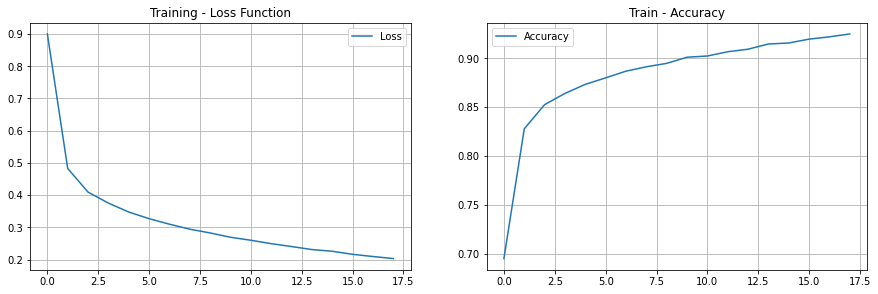

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history12.history['loss'], label='Loss')
#plt.plot(history12.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history12.history['accuracy'], label='Accuracy')
#plt.plot(history12.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model12.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8826


[0.35131770372390747, 0.8826000094413757]

# **MODEL 13**

*   Hidden Layers = 8
* Number of hidden nodes in layer 1 =  1024
* Number of hidden nodes in layer 2 =  512
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  256
* Number of hidden nodes in layer 5 =  128
* Number of hidden nodes in layer 6 =  128
* Number of hidden nodes in layer 7 =  64
* Number of hidden nodes in layer 8 =  32
*   Activation Function = ReLU
*   Loss Function = Categorical Cross-Entropy

In [24]:
model13 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='relu'),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model13.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model13.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_37 (Dense)             (None, 128)              

In [25]:
#train the model
history13 = model13.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8634 - accuracy: 0.6886 - val_loss: 0.4853 - val_accuracy: 0.8266
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4567 - accuracy: 0.8363 - val_loss: 0.3748 - val_accuracy: 0.8658
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3884 - accuracy: 0.8595 - val_loss: 0.3289 - val_accuracy: 0.8798
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3522 - accuracy: 0.8713 - val_loss: 0.3189 - val_accuracy: 0.8802
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.8790 - val_loss: 0.2830 - val_accuracy: 0.8920
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3036 - accuracy: 0.8874 - val_loss: 0.2661 - val_accuracy: 0.9022
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2885 - accuracy: 0.8925 - val_loss: 0.2569 - val_accu

Text(0.5, 1.0, 'Train - Accuracy')

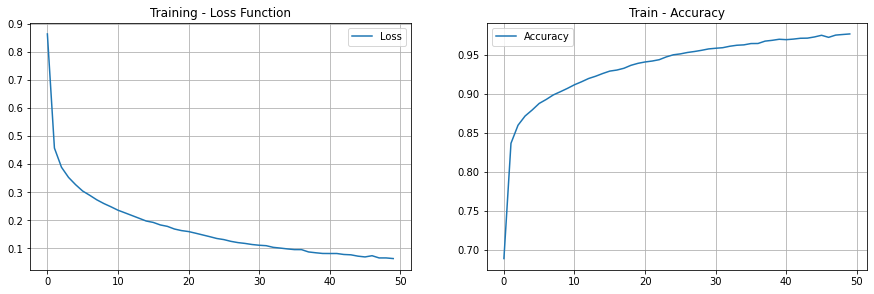

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history13.history['loss'], label='Loss')
#plt.plot(history13.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history13.history['accuracy'], label='Accuracy')
#plt.plot(history13.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [27]:
model13.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.8989


[0.46588701009750366, 0.8988999724388123]

# **MODEL 14**

*   Hidden Layers = 8
* Number of hidden nodes in layer 1 =  1024
* Number of hidden nodes in layer 2 =  512
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  128
* Number of hidden nodes in layer 5 =  128
* Number of hidden nodes in layer 6 =  64
* Number of hidden nodes in layer 7 =  32
* Number of hidden nodes in layer 8 =  16
*   Activation Function = Tanh
*   Loss Function = KL Divergence

In [20]:
model14 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='tanh'),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model14.compile(optimizer='sgd',
             loss=tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model14.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

In [21]:
#train the model
history14 = model14.fit(x_train,y_train,epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7142 - accuracy: 0.7863 - val_loss: 0.4669 - val_accuracy: 0.8514
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4561 - accuracy: 0.8445 - val_loss: 0.4224 - val_accuracy: 0.8512
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4040 - accuracy: 0.8597 - val_loss: 0.3549 - val_accuracy: 0.8780
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8695 - val_loss: 0.3364 - val_accuracy: 0.8788
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3520 - accuracy: 0.8746 - val_loss: 0.3213 - val_accuracy: 0.8860
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3347 - accuracy: 0.8808 - val_loss: 0.3097 - val_accuracy: 0.8900
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3203 - accuracy: 0.8856 - val_loss: 0.2907 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

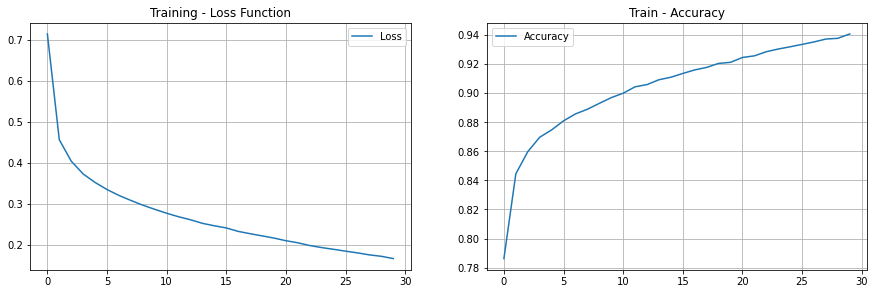

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history14.history['loss'], label='Loss')
#plt.plot(history14.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history14.history['accuracy'], label='Accuracy')
#plt.plot(history14.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [23]:
model14.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8860


[0.3372943103313446, 0.8859999775886536]

# **MODEL 15**

*   Hidden Layers = 9
* Number of hidden nodes in layer 1 =  512
* Number of hidden nodes in layer 2 =  512
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  128
* Number of hidden nodes in layer 5 =  128
* Number of hidden nodes in layer 6 =  64
* Number of hidden nodes in layer 7 =  32
* Number of hidden nodes in layer 8 =  32
* Number of hidden nodes in layer 9 =  16
*   Activation Function = Tanh
*   Loss Function = KL Divergence

In [ ]:
# Model 15
"""
Hidden Layers =9
Number of hidden nodes in layers =  512, 512, 256, 128, 128, 64, 32, 32, 16
Activation Function = tanh
Loss function = KL Divergence

"""
model15 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
sgd = tf.keras.optimizers.SGD(learning_rate= 0.005)
model15.compile(optimizer= sgd,
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model15.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_74 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 64)              

In [ ]:
#train the model
history15 = model15.fit(X_train,Y_train,epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9294 - accuracy: 0.7599 - val_loss: 0.5960 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5468 - accuracy: 0.8308 - val_loss: 0.5070 - val_accuracy: 0.8362
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4687 - accuracy: 0.8463 - val_loss: 0.4544 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4280 - accuracy: 0.8573 - val_loss: 0.4248 - val_accuracy: 0.8530
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4009 - accuracy: 0.8653 - val_loss: 0.4055 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3813 - accuracy: 0.8695 - val_loss: 0.3868 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3645 - accuracy: 0.8737 - val_loss: 0.3761 - val_accuracy

Text(0.5, 1.0, 'Train - Accuracy')

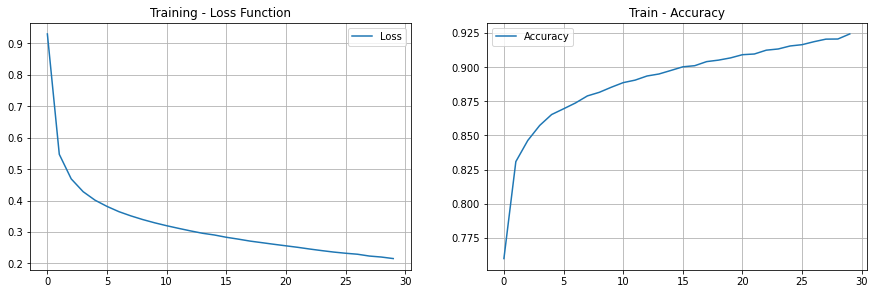

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history15.history['loss'], label='Loss')
#plt.plot(history15.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history15.history['accuracy'], label='Accuracy')
#plt.plot(history15.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model15.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8704


[0.37129536271095276, 0.8704000115394592]

# **MODEL 16**

*   Hidden Layers = 10
* Number of hidden nodes in layer 1 =  1024
* Number of hidden nodes in layer 2 =  512
* Number of hidden nodes in layer 3 =  256
* Number of hidden nodes in layer 4 =  256
* Number of hidden nodes in layer 5 =  128
* Number of hidden nodes in layer 6 =  128
* Number of hidden nodes in layer 7 =  64
* Number of hidden nodes in layer 8 =  32
* Number of hidden nodes in layer 9 =  16
* Number of hidden nodes in layer 10 =  16
*   Activation Function = Tanh
*   Loss Function = Categorical Cross-Entropy

In [28]:
# Model 16
"""
Hidden Layers =10
Number of hidden nodes = 1024,512,256,256,128,128,64,32,16,16
Activation Function = tanh
Loss function = Categorical cross entropy

"""
model16 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='tanh'),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model16.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model16.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_46 (Dense)             (None, 128)              

In [29]:
#train the model
history16 = model16.fit(x_train,y_train,epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7937 - accuracy: 0.7813 - val_loss: 0.4987 - val_accuracy: 0.8436
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4713 - accuracy: 0.8439 - val_loss: 0.4185 - val_accuracy: 0.8666
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4122 - accuracy: 0.8589 - val_loss: 0.3620 - val_accuracy: 0.8792
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3776 - accuracy: 0.8699 - val_loss: 0.3656 - val_accuracy: 0.8714
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3534 - accuracy: 0.8766 - val_loss: 0.3230 - val_accuracy: 0.8896
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3353 - accuracy: 0.8829 - val_loss: 0.3248 - val_accuracy: 0.8836
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3194 - accuracy: 0.8864 - val_loss: 0.2934 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

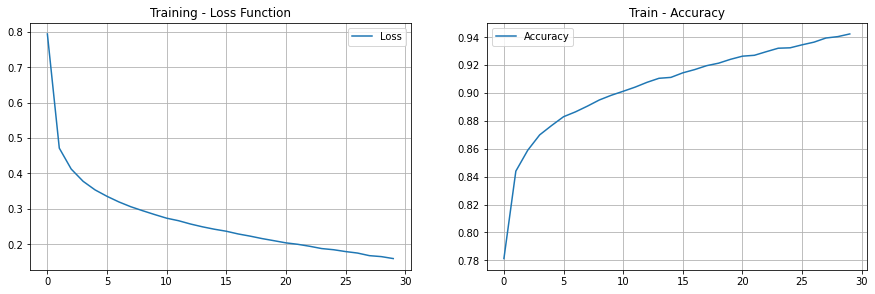

In [44]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history16.history['loss'], label='Loss')
#plt.plot(history16.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history16.history['accuracy'], label='Accuracy')
#plt.plot(history16.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [32]:
model16.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8841


[0.3501225709915161, 0.8841000199317932]

#**MODEL 17**

*   Hidden Layers = 5
* Number of hidden nodes in layer 1 =  256
* Number of hidden nodes in layer 2 =  128
* Number of hidden nodes in layer 3 =  64
* Number of hidden nodes in layer 4 =  32
* Number of hidden nodes in layer 5 =  16
*   Activation Function = ReLU
*   Loss Function = KL Divergence

In [ ]:
# Model 17
"""
Hidden Layers =5
Number of hidden nodes = 256,128,64,32,16
Activation Function = Relu
Loss function = KL divergence

"""
model17 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model17.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model17.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_93 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_94 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_95 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_96 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_97 (Dense)             (None, 10)              

In [ ]:
#train the model
history17 = model17.fit(x_train,y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8433 - accuracy: 0.7138 - val_loss: 0.5148 - val_accuracy: 0.8264
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4725 - accuracy: 0.8333 - val_loss: 0.4511 - val_accuracy: 0.8268
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4153 - accuracy: 0.8510 - val_loss: 0.3668 - val_accuracy: 0.8696
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3816 - accuracy: 0.8628 - val_loss: 0.3397 - val_accuracy: 0.8782
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3601 - accuracy: 0.8680 - val_loss: 0.3270 - val_accuracy: 0.8838
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3426 - accuracy: 0.8742 - val_loss: 0.3889 - val_accuracy: 0.8544
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3271 - accuracy: 0.8793 - val_loss: 0.2993 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

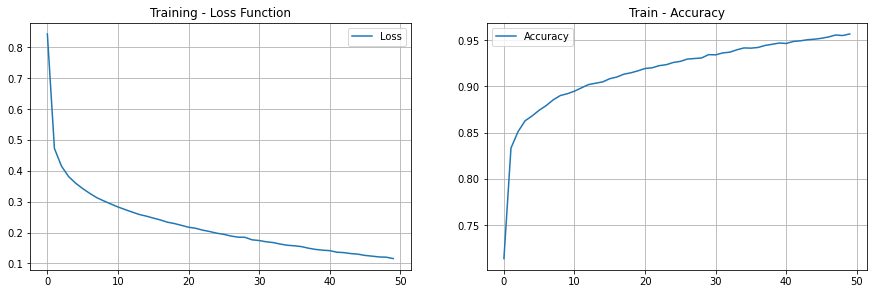

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history17.history['loss'], label='Loss')
#plt.plot(history17.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history17.history['accuracy'], label='Accuracy')
#plt.plot(history17.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model17.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.8860


[0.42469364404678345, 0.8859999775886536]